## EE 242 Lab 3b – Frequency Domain Representation of Signals - Fourier Transform

Mason Wheeler

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [4]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, we will learn how to build periodic signals from component sinusoids and how to transform signals from the time domain to the frequency domain. The concepts we’ll focus on include: implementation of the Fourier Series synthesis equation, using a discrete implementation of the Fourier Transform (DFT) with a digitized signal, and understanding the relationship between the discrete DFT index k and frequency
ω for both the original continuous signal x(t). This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 3b turn in checklist

•	Lab 3b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 3 -- Analyzing frequency content of a signal

For this assignment, you will use a discrete Fourier transform (specifically, the Python implementation of an FFT) to analyze the frequency content of the 100ms segment of the horn signal from assignment 2. Because this is a periodic signal, the frequency content will have spikes, but because it is a discrete-time signal, they will have finite height. You will experiment with different FFT sizes and different plotting options. The description below assumes that you import numpy as np.

**A.** Use the np.fft.fft function to compute the FFT for the 100 ms horn signal, with an fft size of nfft=1024, which you can call **xhf**. Recall that the result of the FFT will be a vector that spans frequencies [0,$f_s$]. If this is a real-valued signal, then the first half of the FFT matters: [0,nfft/2]. In order to get positive and negative frequencies, you need to use the np.fft.fftshift function to get **xhf2**. Create two different plots of the magnitude of result using **(np.abs(.))** in a 2x1 view: one with positive and negative frequencies and one with just positive frequencies. Be sure to scale according to time signal window length. Label the frequency axis in terms of Hz by creating a vector **freq** that scales the FFT index by $f_s$/nfft. The one-sided version should look like the picture above. The two-sided version should be an even function.

**B.** It is often the case that frequency content is plotted on a log scale. Again using a 2x1 view, plot the one-sided (positive frequency) magnitude using both linear and log scale.

**C.**  Changing the size of the FFT will change the frequency resolution, but it also changes the shape of the result a bit. Just as we saw with Gibbs phenomenon where increasing the number of Fourier series coefficients gave a high frequency ringing at sharp edges, increasing the FFT window will give a “ringing” effect for sharp peaks in frequency. To see this effect, compute the FFT using nfft=2048 and plot the log magnitude compared to nfft=1024, in both cases just using positive frequencies. (The effect is easier to see when plotting magnitude on a log scale.)


<IPython.core.display.Javascript object>


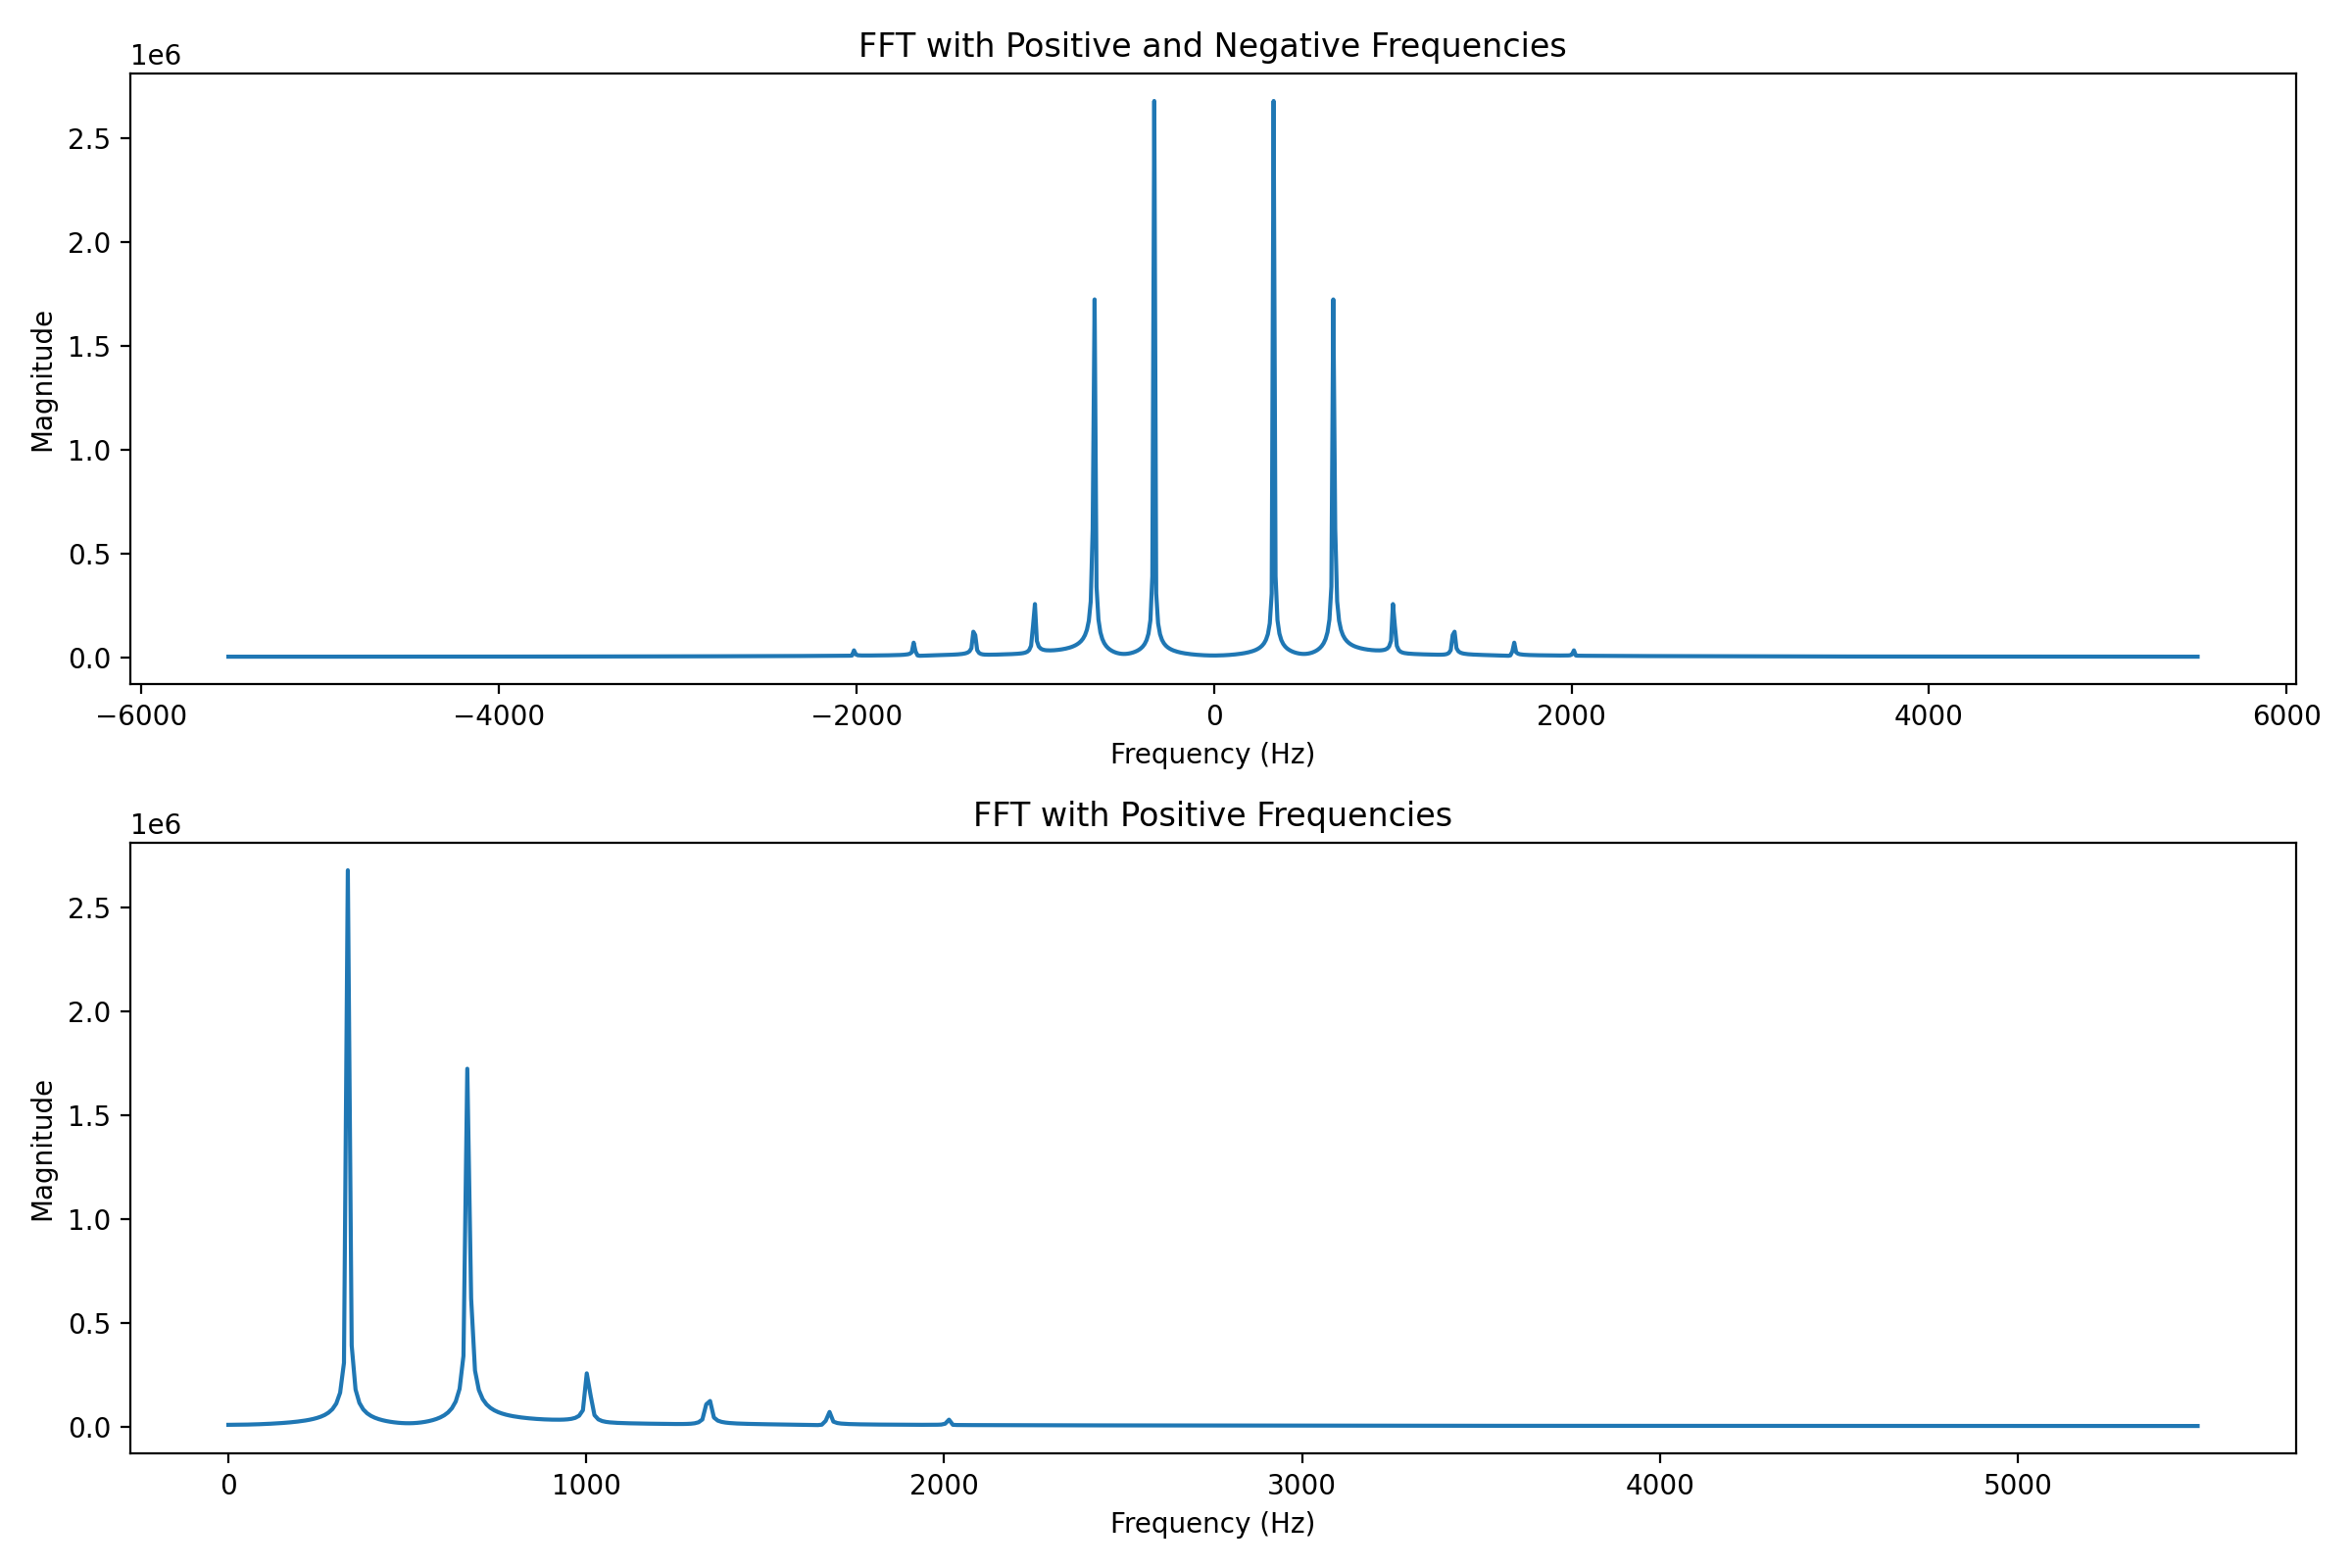

<IPython.core.display.Javascript object>


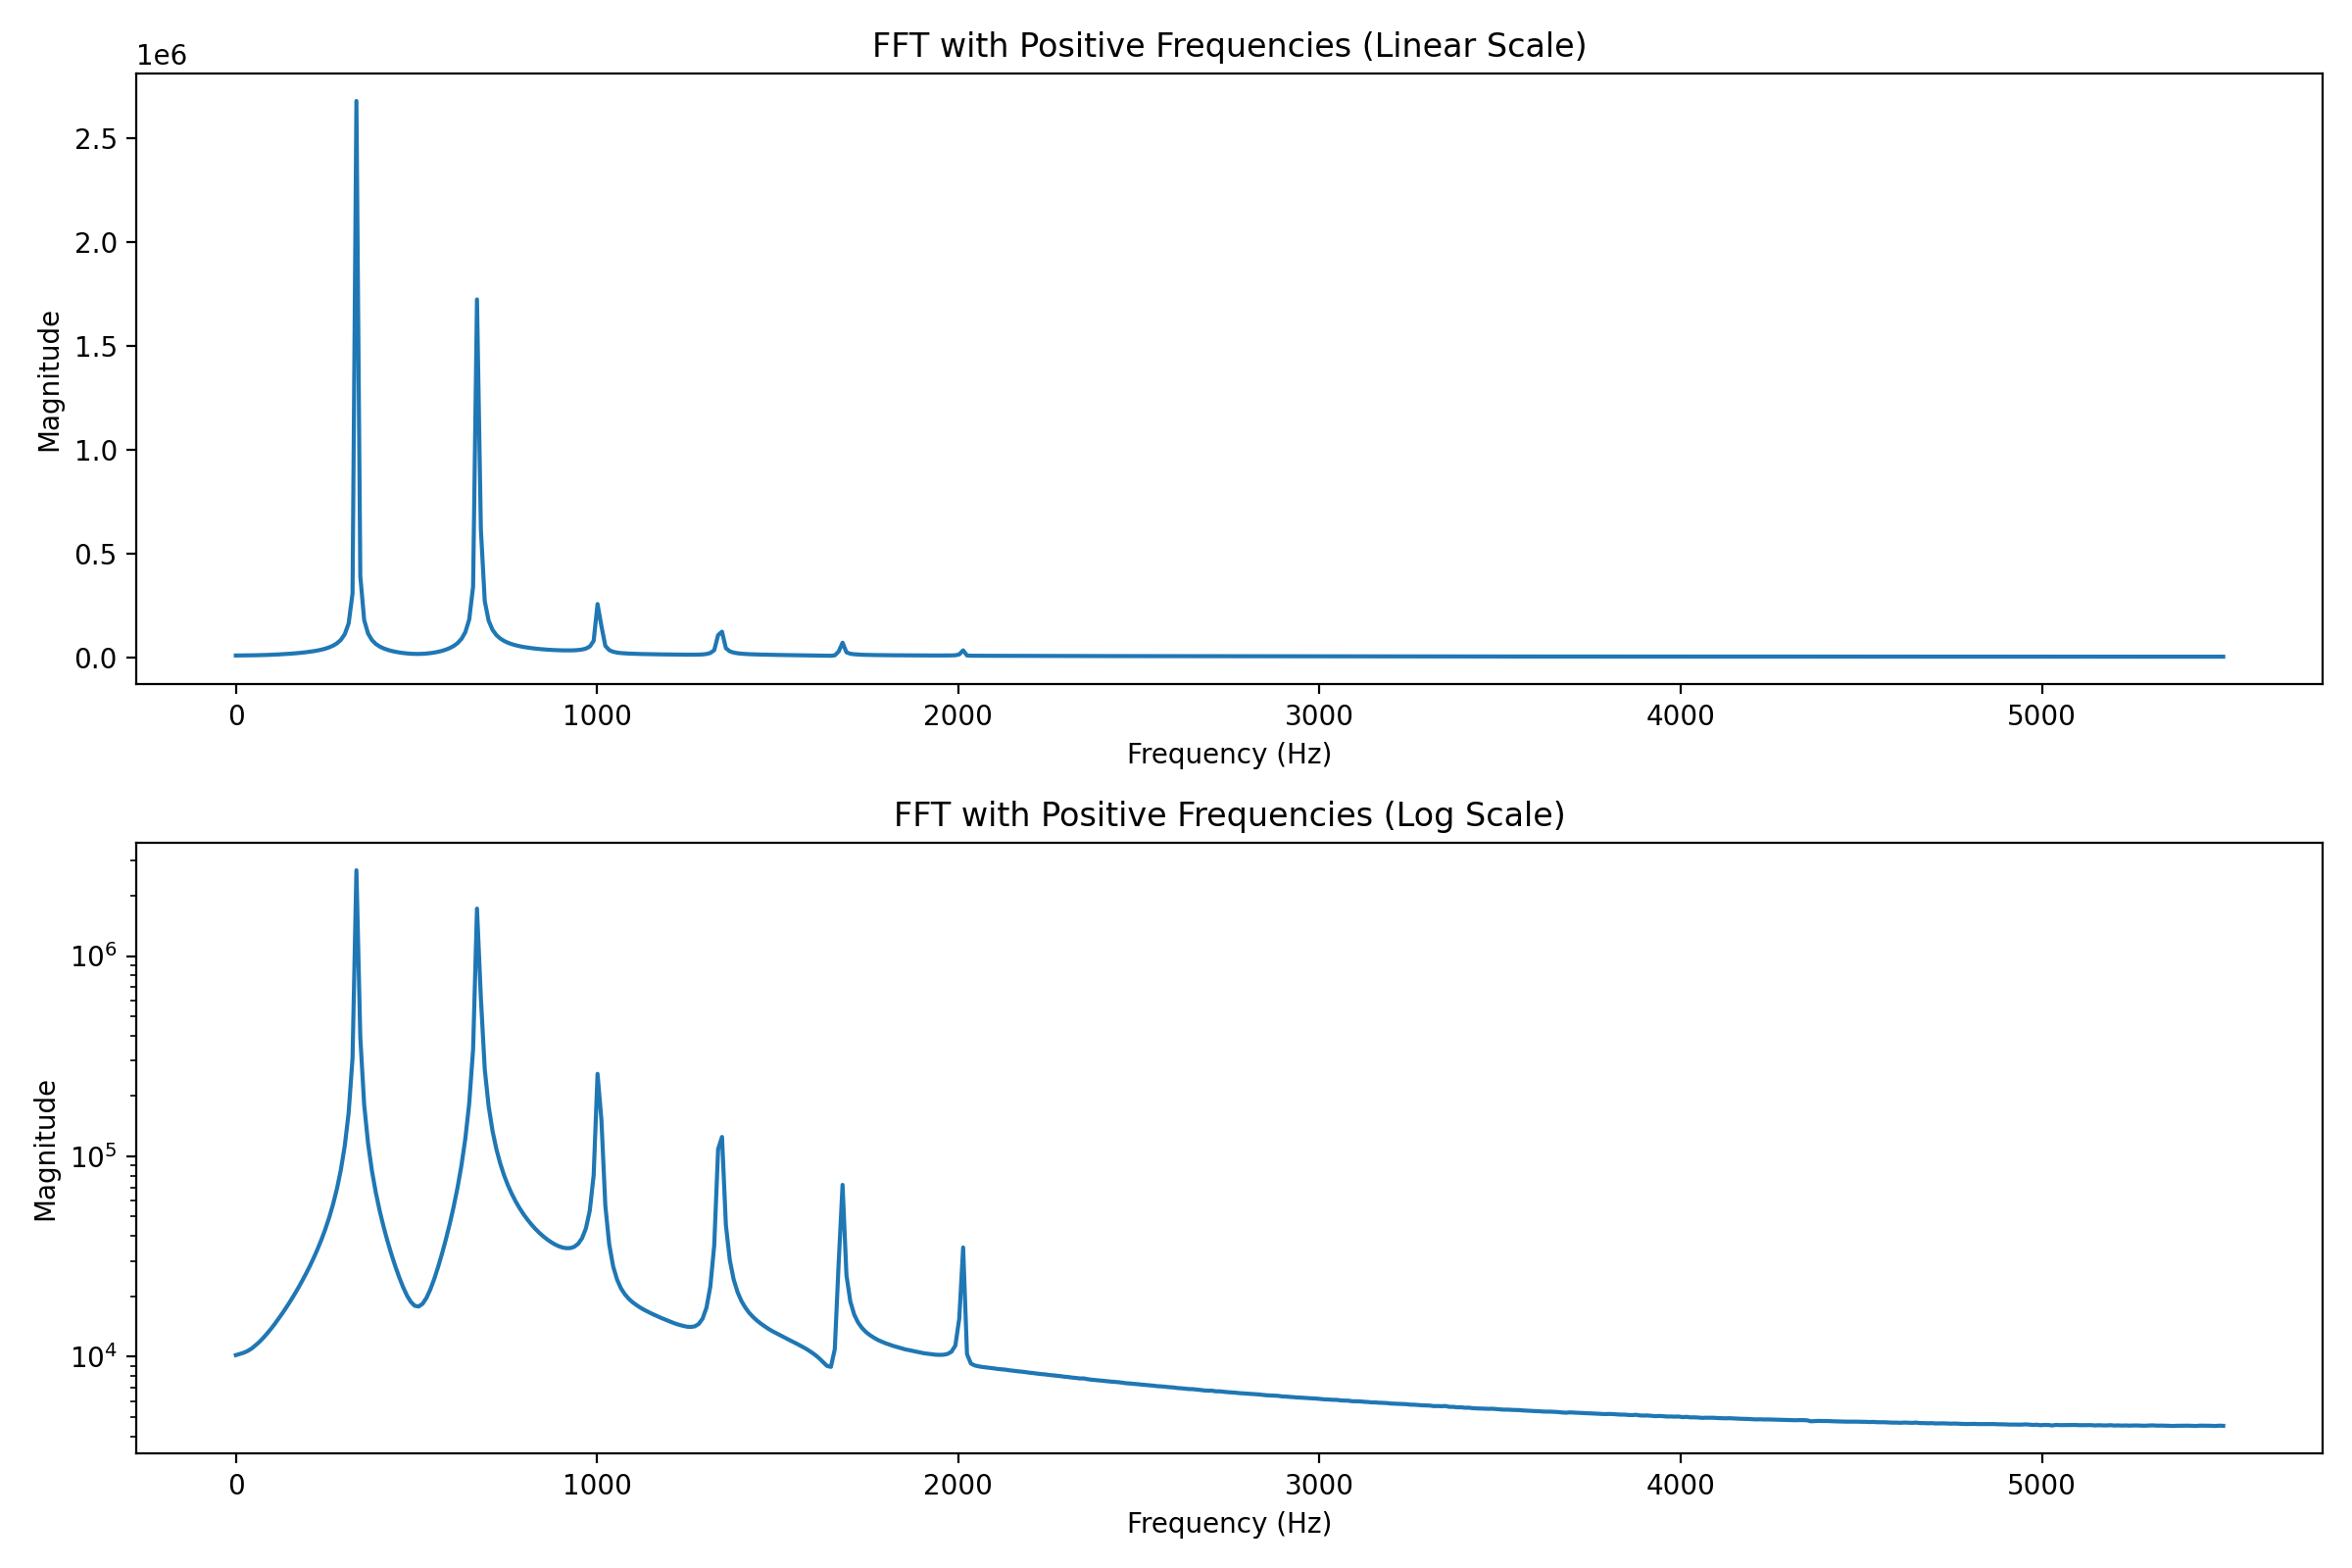

<IPython.core.display.Javascript object>


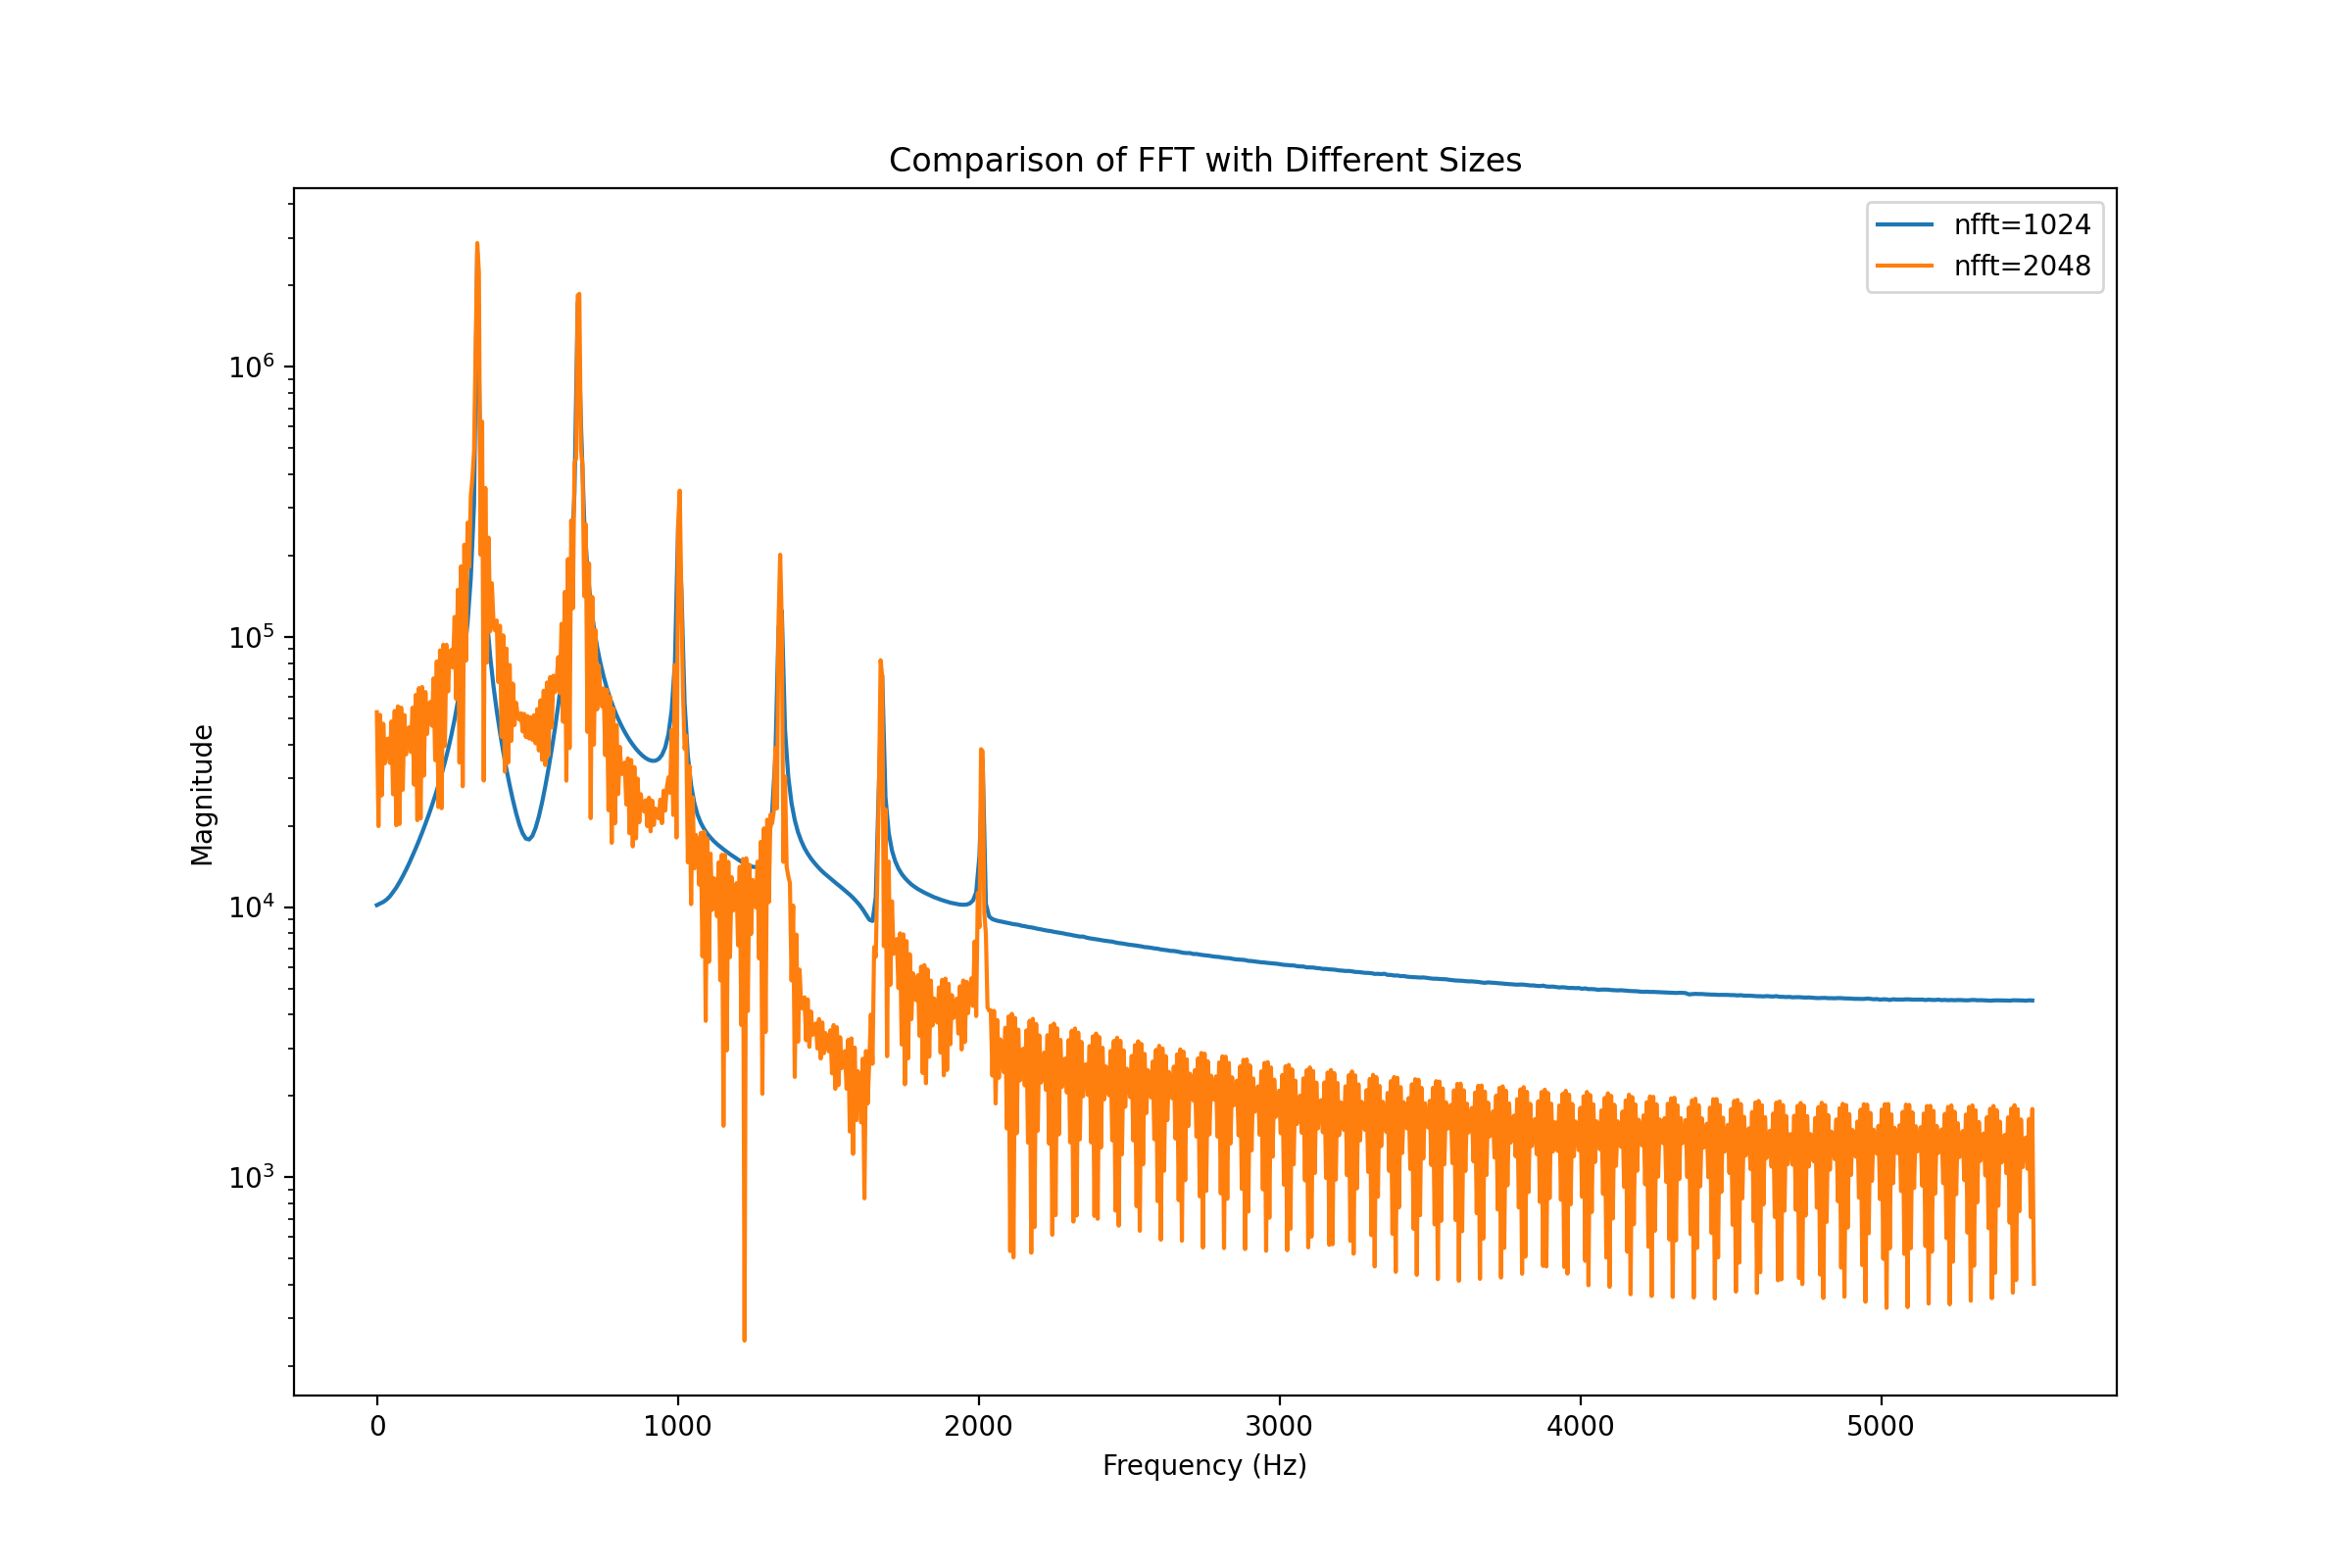

In [5]:
# Assignment 3 - Analyzing frequency content of a signal
# Import necessary libraries
from scipy.io import wavfile

# 3.)

# Read the horn signal from the .wav file
fs, horn_signal = wavfile.read('horn_approximation.wav')

# Ensure the signal is in float representation
horn_signal = horn_signal.astype(float)

# 3a.)
# Compute the FFT of the signal with a size of 1024
nfft = 1024
xhf = np.fft.fft(horn_signal, nfft)

# Shift the zero-frequency component to the center of the spectrum
xhf2 = np.fft.fftshift(xhf)

# Create a vector that scales the FFT index by fs/nfft
freq = np.fft.fftfreq(nfft, 1/fs)
freq_shifted = np.fft.fftshift(freq)

# Create a 2x1 plot of the magnitude of the FFT result
plt.figure(figsize=(12, 8))

# Plot the FFT with both positive and negative frequencies
plt.subplot(2, 1, 1)
plt.plot(freq_shifted, np.abs(xhf2))
plt.title('FFT with Positive and Negative Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the FFT with only positive frequencies
plt.subplot(2, 1, 2)
plt.plot(freq[:nfft//2], np.abs(xhf[:nfft//2]))
plt.title('FFT with Positive Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# 3b.)
# Create a 2x1 plot of the magnitude of the FFT result on a linear and log scale
plt.figure(figsize=(12, 8))

# Plot the FFT with positive frequencies on a linear scale
plt.subplot(2, 1, 1)
plt.plot(freq[:nfft//2], np.abs(xhf[:nfft//2]))
plt.title('FFT with Positive Frequencies (Linear Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the FFT with positive frequencies on a log scale
plt.subplot(2, 1, 2)
plt.semilogy(freq[:nfft//2], np.abs(xhf[:nfft//2]))
plt.title('FFT with Positive Frequencies (Log Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# 3c.)
# Compute the FFT of the signal with a size of 2048
nfft2 = 2048
xhf_new = np.fft.fft(horn_signal, nfft2)

# Create a new frequency vector for the larger FFT size
freq_new = np.fft.fftfreq(nfft2, 1/fs)

# Plot the log magnitude of the FFT for both sizes
plt.figure(figsize=(12, 8))

# Plot the FFT with nfft=1024
plt.semilogy(freq[:nfft//2], np.abs(xhf[:nfft//2]), label='nfft=1024')

# Plot the FFT with nfft=2048
plt.semilogy(freq_new[:nfft2//2], np.abs(xhf_new[:nfft2//2]), label='nfft=2048')

plt.title('Comparison of FFT with Different Sizes')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.show()




###  Discussion

In assignment 2, we used specific cosine frequencies to approximate the horn note,
assuming the signal is periodic so the harmonics have non-zero energy. The FFT results show a different picture, and the synthesized version is easily distinguished from the original. Discuss reasons for these differences.

### Answer

In Assignment 2, we used a Fourier series to approximate the horn note, assuming the signal is perfectly periodic. However, real-world signals are rarely perfectly periodic and often contain non-harmonic components. This is why the synthesized version of the horn note can be easily distinguished from the original.

The FFT results from Assignment 3 provide a more accurate representation of the frequency content of the horn note. The FFT captures the non-harmonic components and the variations in the frequency content of the signal over time, which the Fourier series approximation does not.

The differences between the Fourier series approximation and the FFT results can be seen in the frequency plots. The Fourier series approximation only contains discrete frequency components at the harmonic frequencies, while the FFT results show a continuous spectrum with non-zero values at non-harmonic frequencies.

Auditorily, the synthesized version of the horn note might sound less natural compared to the original due to the missing non-harmonic components and variations in frequency content.

## Assignment 4 -- Comparing frequency content of a signal

Many interesting time signals have changing frequency content. Music is one example, since different notes have different fundamental frequency. Speech is another example: we distinguish different vowels and consonants based on their frequency content. In this assignment, you will use the FFT to compare the frequency content of two different speech sounds in a sentence. We’ll use 30ms windows, where the frequency content is relatively stable.

**A.**  Download the signal "bluenose3.wav", and read in the file. Plot the full waveform, using the sampling frequency to correctly label the time access. Play the file.

**B.**  Extract the samples corresponding to times [0.75,0.78]. (This corresponds to the “oo” sound in the word “grew.”) Using a 2x1 plot, plot the time waveform (labeling the time axis with the specified time region) and the magnitude of the frequency response (positive frequencies only, labeling the frequency axis in Hz).

**C.**  Repeat the exercise above using the samples corresponding to times [2.565,2.595]. (This corresponds to the “s” sound.)

**D.** State what size FFT you used and explain your choice. Comment on the differences
between the time and frequency plots for the two segments and the auditory differences.



<IPython.core.display.Javascript object>


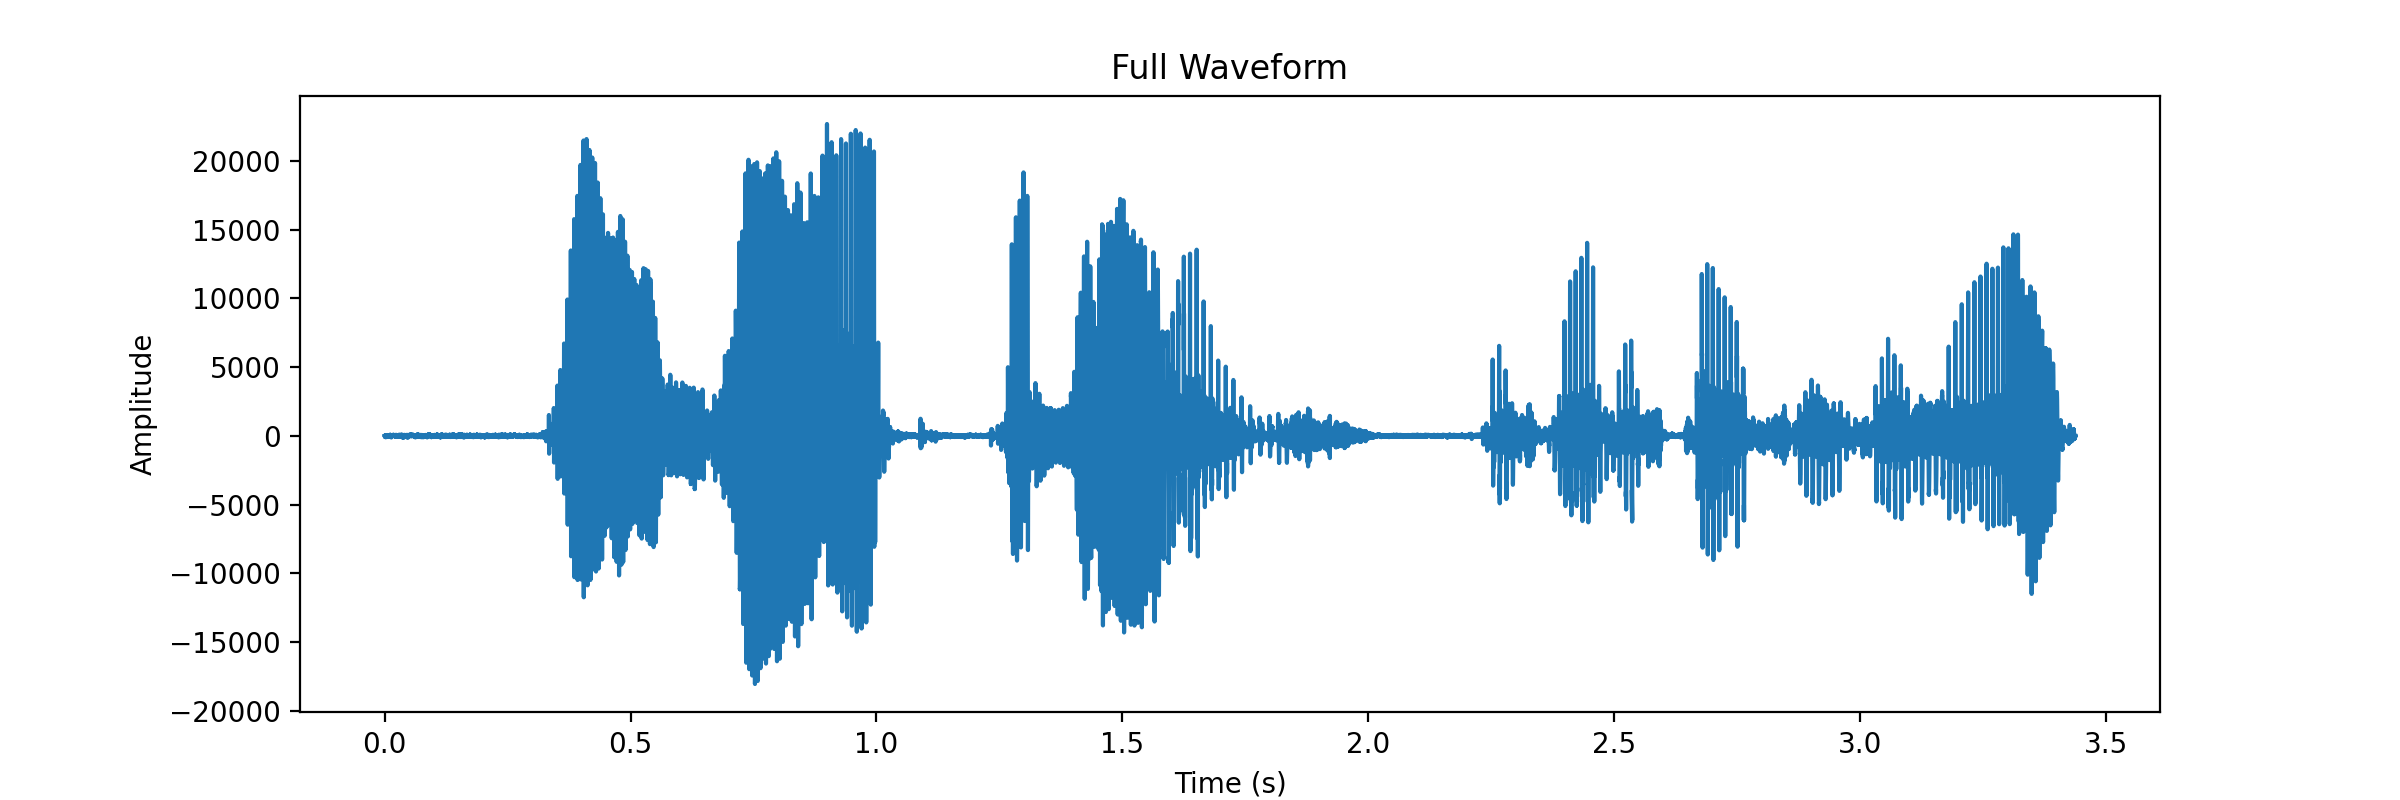

<IPython.core.display.Javascript object>


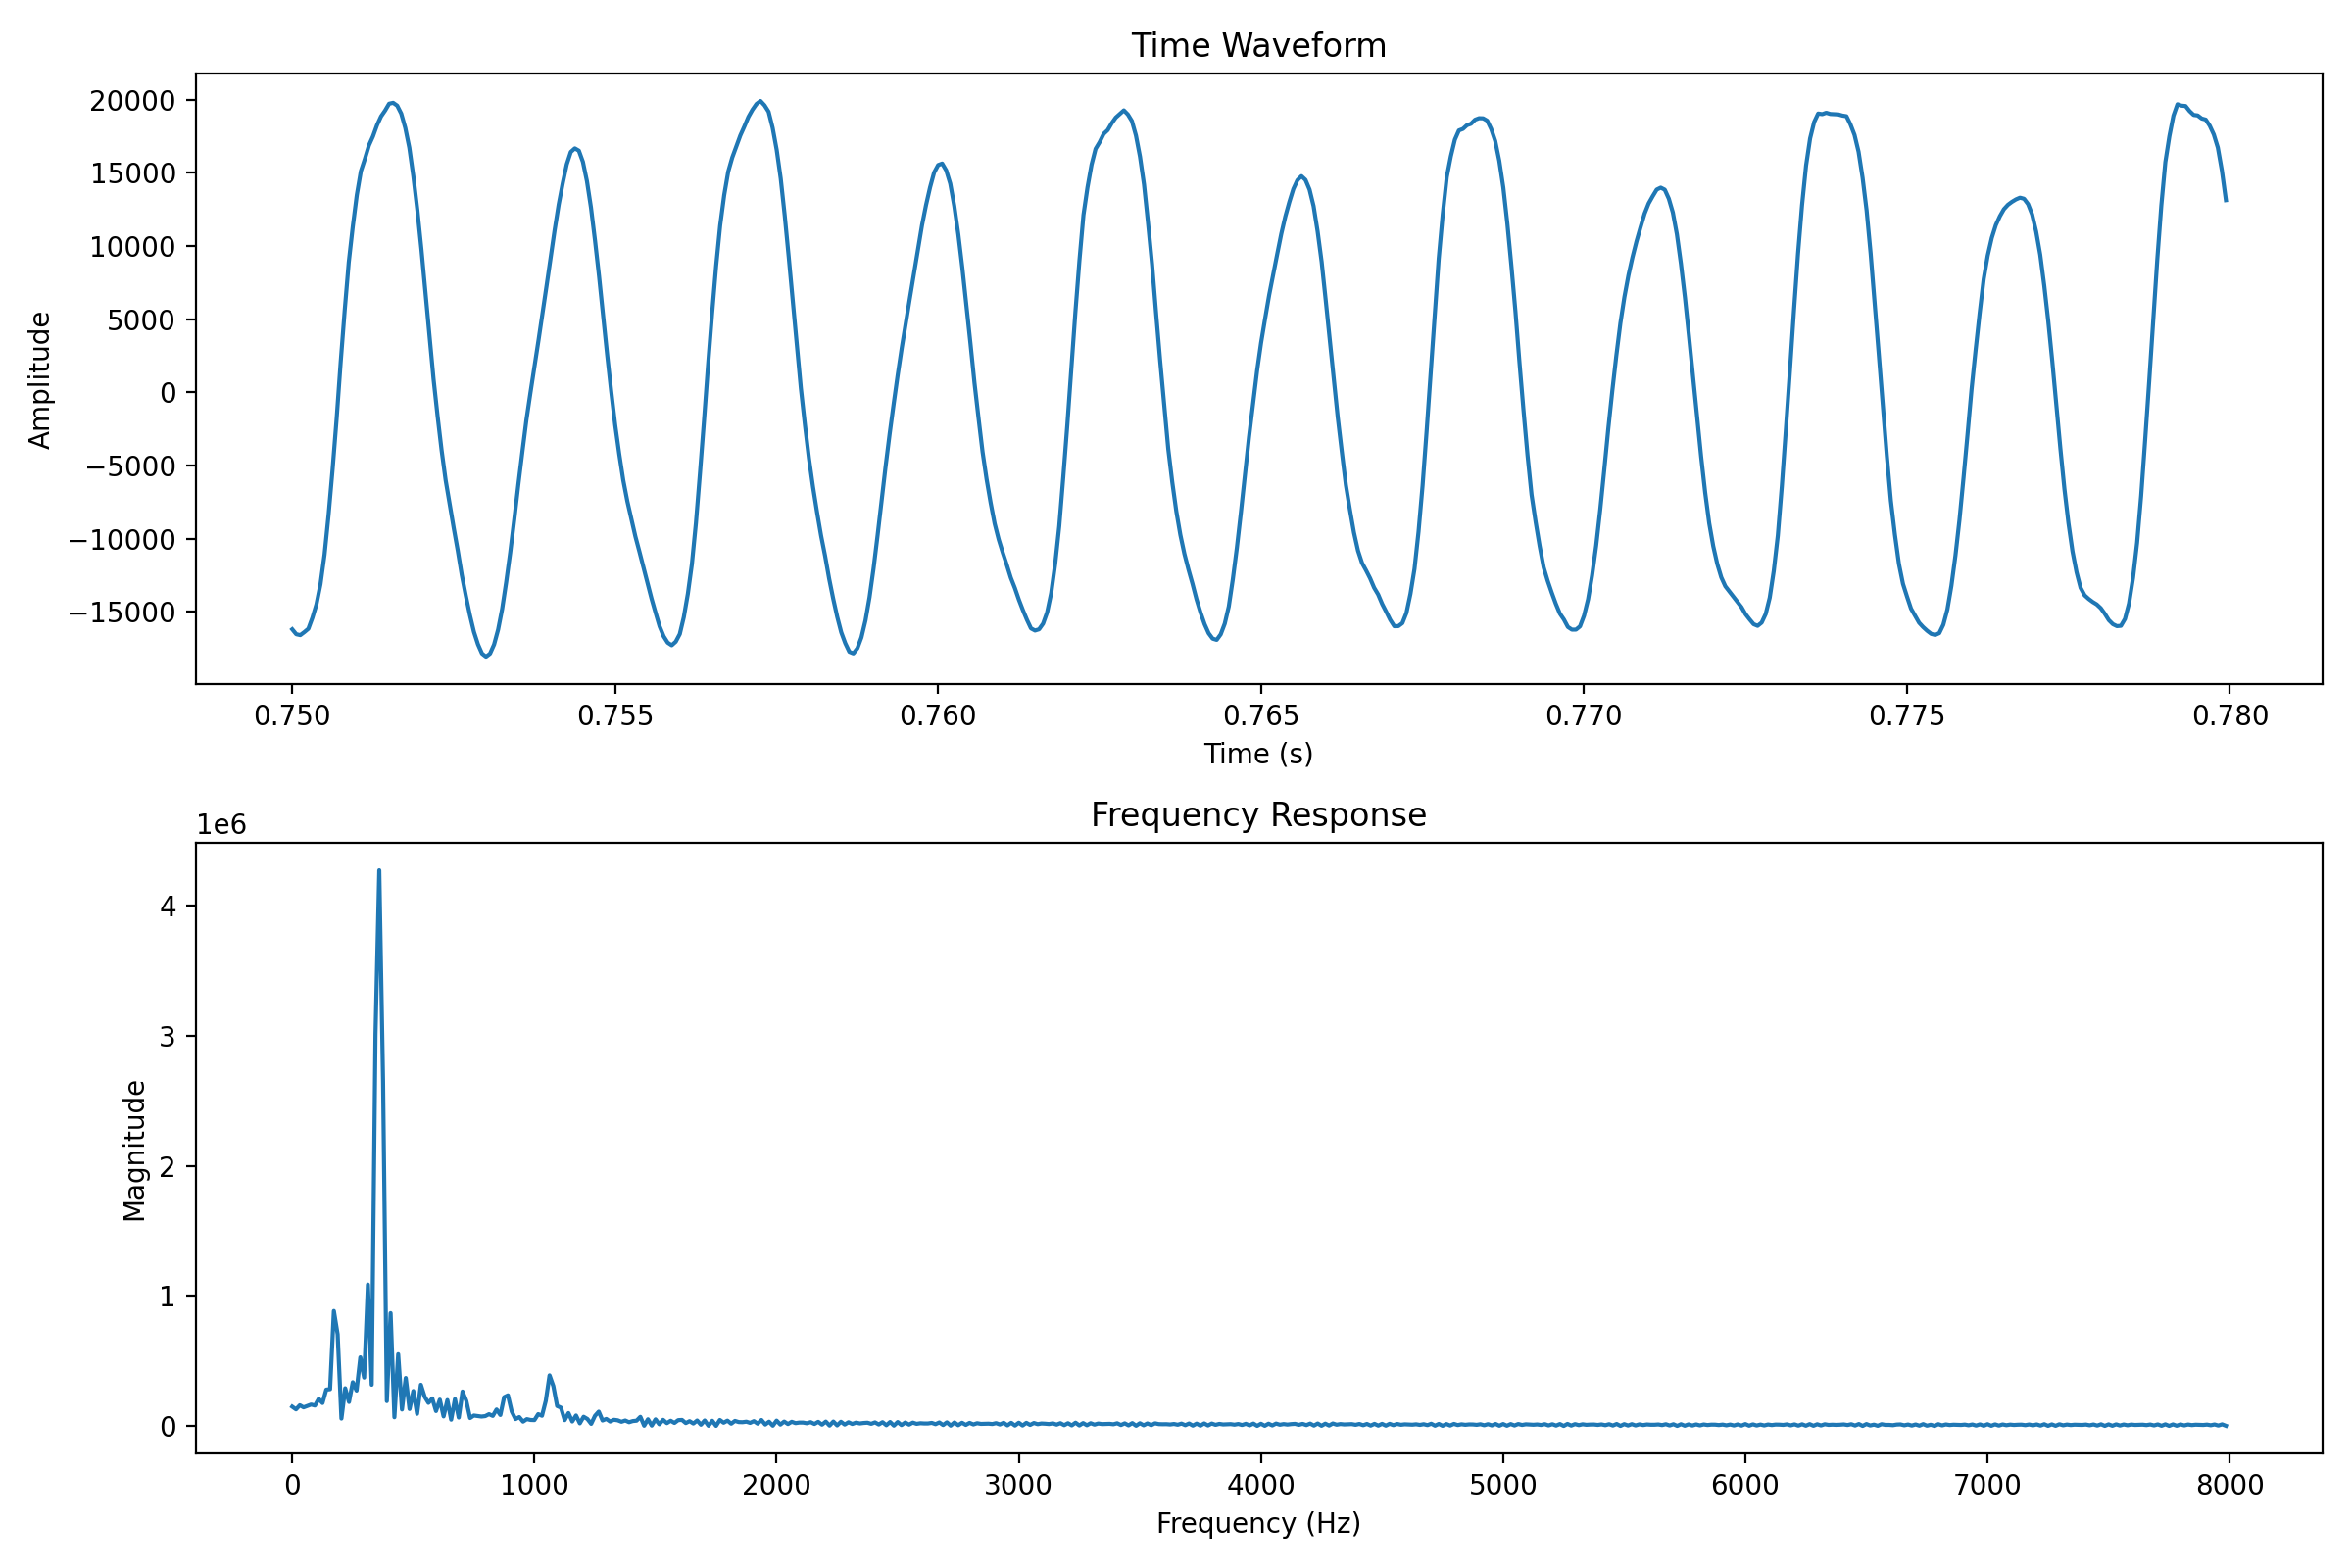

<IPython.core.display.Javascript object>


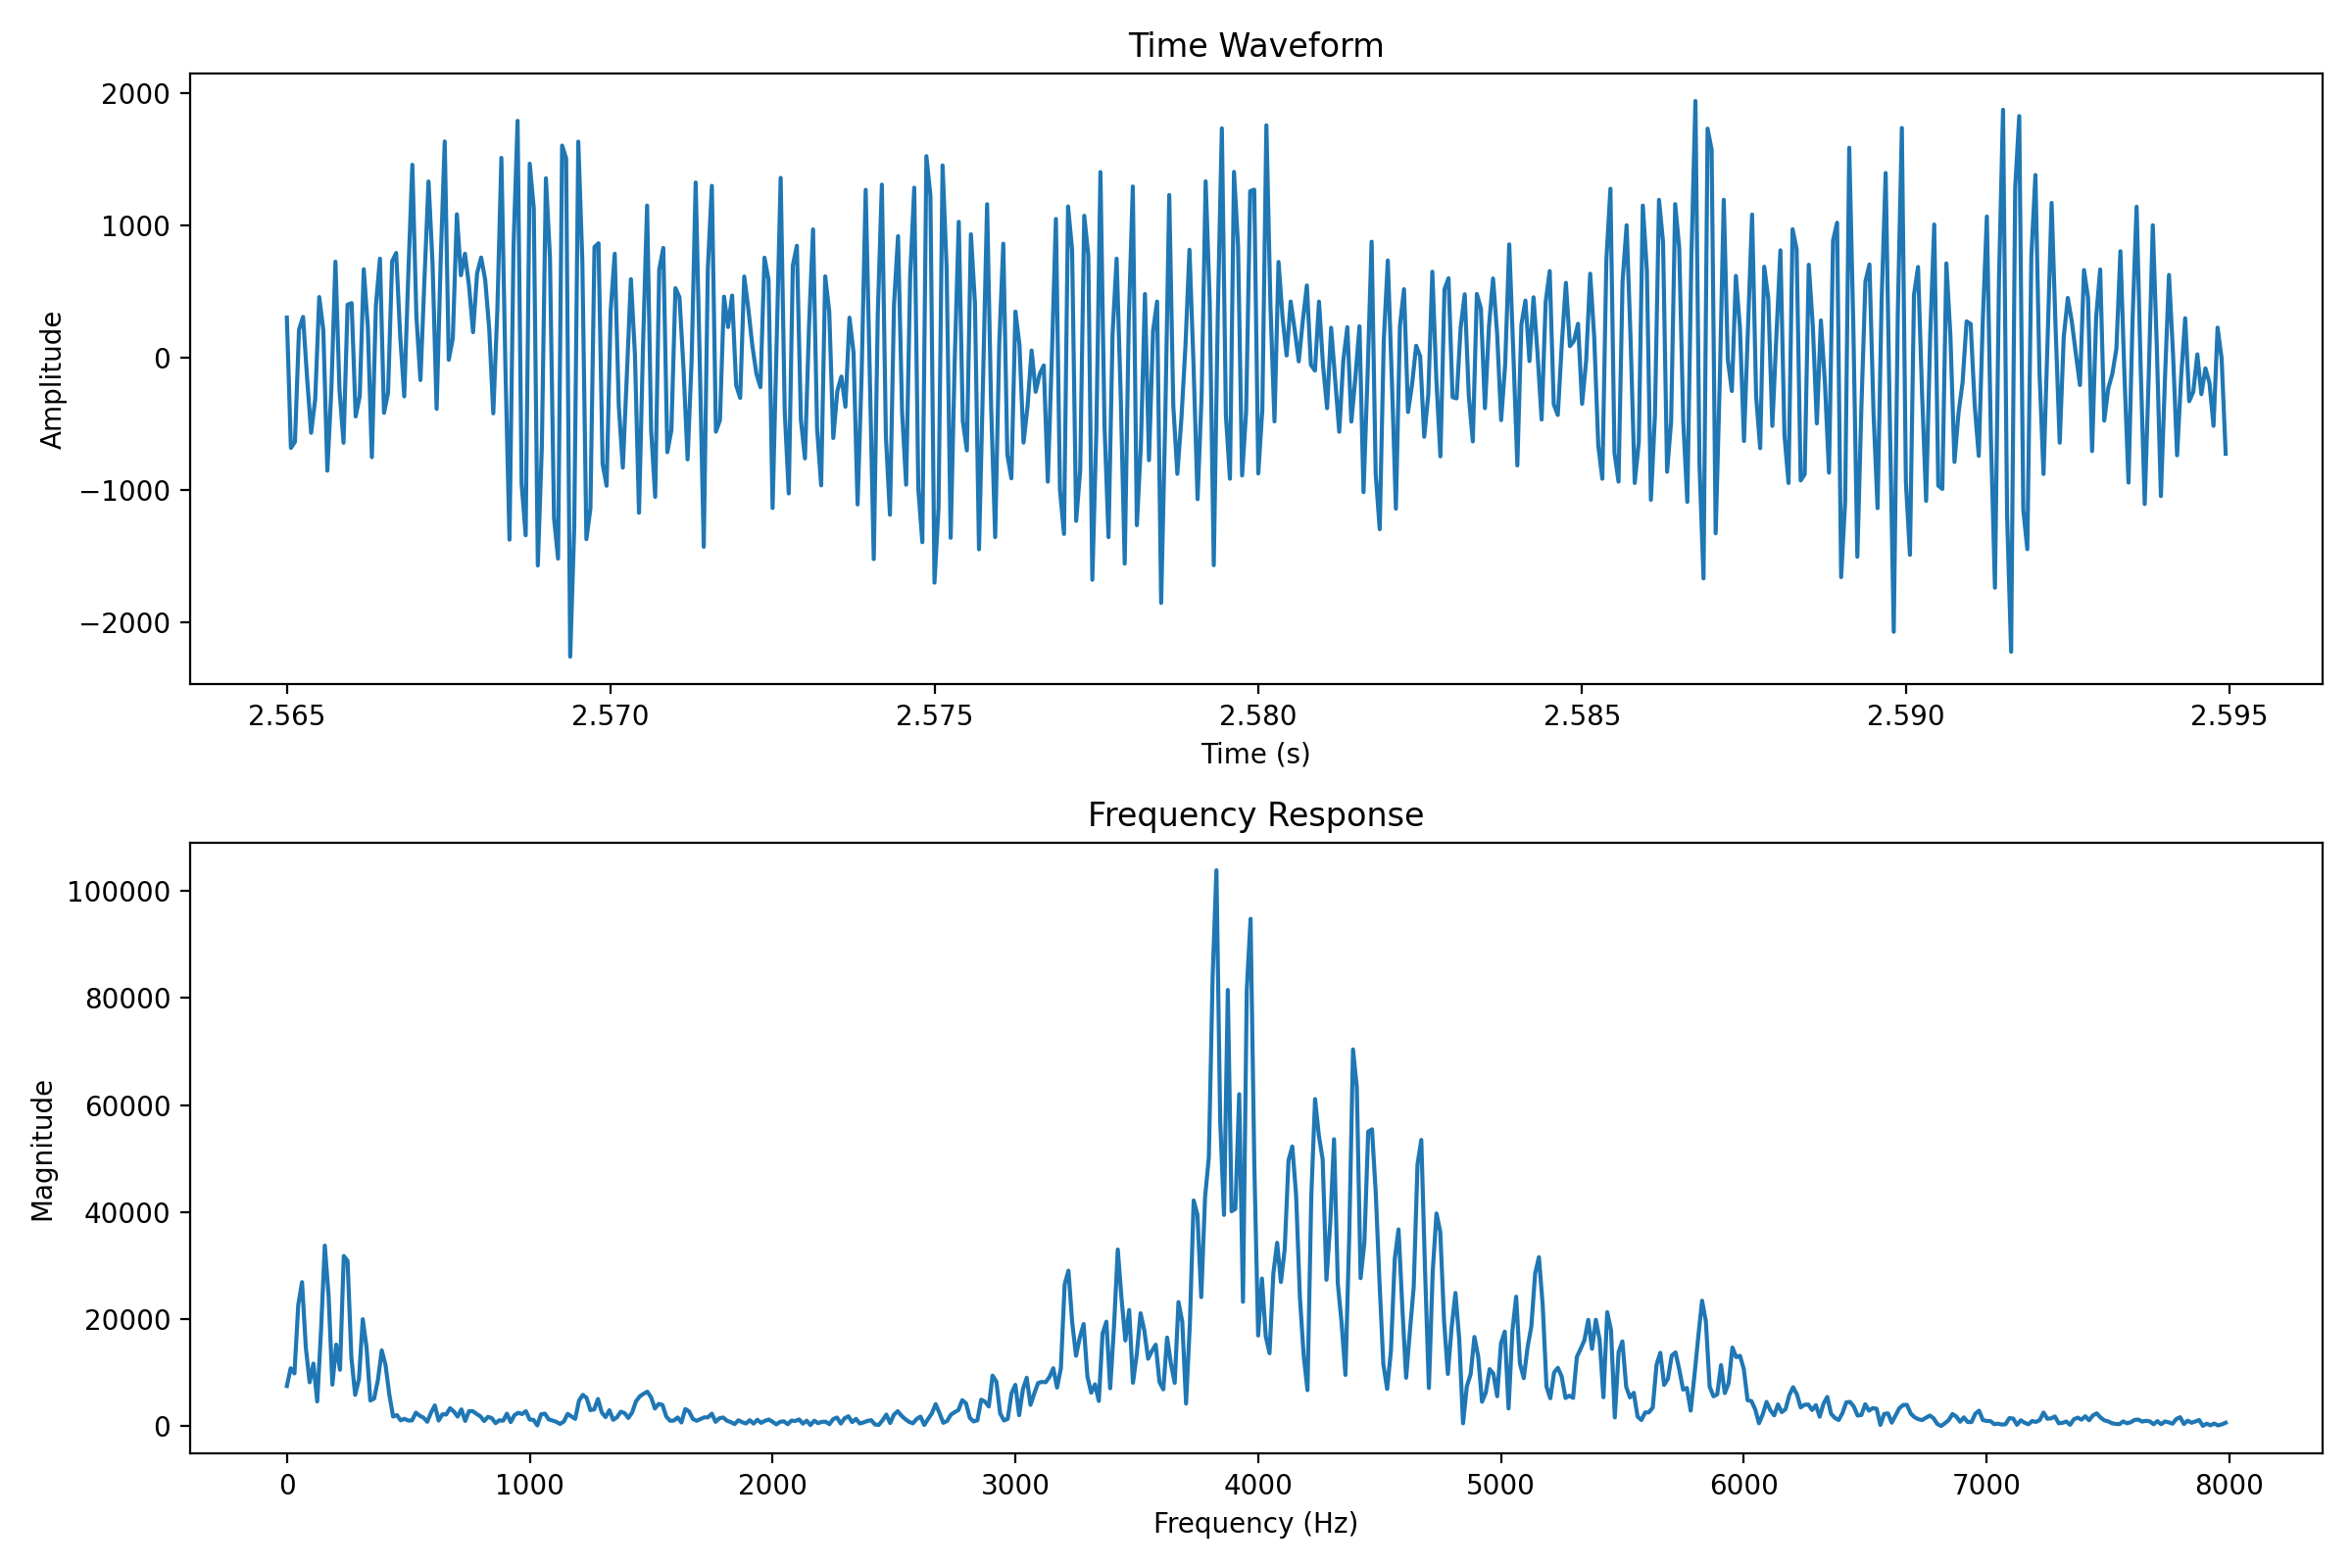

In [6]:
# Assignment 4 - Comparing frequency content of a signal

# 4a.)
# Read the signal from the .wav file
fs, signal = wavfile.read('bluenose3.wav')

# Ensure the signal is in float representation
signal = signal.astype(float)

# Create a time vector
time = np.arange(len(signal)) / fs

# Plot the full waveform
plt.figure(figsize=(12, 4))
plt.plot(time, signal)
plt.title('Full Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# 4b.)
# Extract the samples for the specified time interval
start_time_b = 0.75
end_time_b = 0.78
signal_b = signal[int(start_time_b * fs):int(end_time_b * fs)]

# Compute the FFT of the signal
nfft = 1024  # FFT size (to be explained in 4d.)
xhf_b = np.fft.fft(signal_b, nfft)

# Create a frequency vector
freq_b = np.fft.fftfreq(nfft, 1/fs)

# Create a 2x1 plot
plt.figure(figsize=(12, 8))

# Plot the time waveform
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(signal_b)) / fs + start_time_b, signal_b)
plt.title('Time Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the magnitude of the frequency response
plt.subplot(2, 1, 2)
plt.plot(freq_b[:nfft//2], np.abs(xhf_b[:nfft//2]))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# 4c.)
# Extract the samples for the specified time interval
start_time_c = 2.565
end_time_c = 2.595
signal_c = signal[int(start_time_c * fs):int(end_time_c * fs)]

# Compute the FFT of the signal
xhf_c = np.fft.fft(signal_c, nfft)

# Create a frequency vector
freq_c = np.fft.fftfreq(nfft, 1/fs)

# Create a 2x1 plot
plt.figure(figsize=(12, 8))

# Plot the time waveform
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(signal_c)) / fs + start_time_c, signal_c)
plt.title('Time Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the magnitude of the frequency response
plt.subplot(2, 1, 2)
plt.plot(freq_c[:nfft//2], np.abs(xhf_c[:nfft//2]))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# 4d.)
# The FFT size was chosen to be 1024. This size was chosen because it is a power of 2,
# which is computationally efficient for the FFT algorithm. It also provides a good balance
# between time and frequency resolution for this analysis.
# The time plots show the amplitude of the signal over time, while the frequency plots show
# the magnitude of the different frequencies present in the signal. The "oo" sound has a
# lower frequency content compared to the "s" sound, which has a higher frequency content.


###  Discussion

State what size FFT you used and explain your choice. Comment on the differences between the time and frequency plots for the two segments and the auditory differences.

### Answer

The FFT size used in the solution was 1024. This size was chosen because it is a power of 2, which is computationally efficient for the FFT algorithm. It also provides a good balance between time and frequency resolution for this analysis.

The time plots show the amplitude of the signal over time, while the frequency plots show the magnitude of the different frequencies present in the signal.

The "oo" sound in the word "grew" (time interval [0.75, 0.78]) has a lower frequency content compared to the "s" sound (time interval [2.565, 2.595]). This is evident from the frequency plots where the peak of the "oo" sound is at a lower frequency than the "s" sound.

Auditorily, these differences in frequency content contribute to our perception of the different sounds. Lower frequencies are perceived as deeper or more bass-like sounds, while higher frequencies are perceived as sharper or more treble-like sounds. Therefore, the "oo" sound is perceived as a deeper sound, while the "s" sound is perceived as a sharper sound.

The fundamental frequency for signal_b is -359.375 Hz, which corresponds to the note C0.
The fundamental frequency for signal_c is -3828.125 Hz, which corresponds to the note C0.


<IPython.core.display.Javascript object>


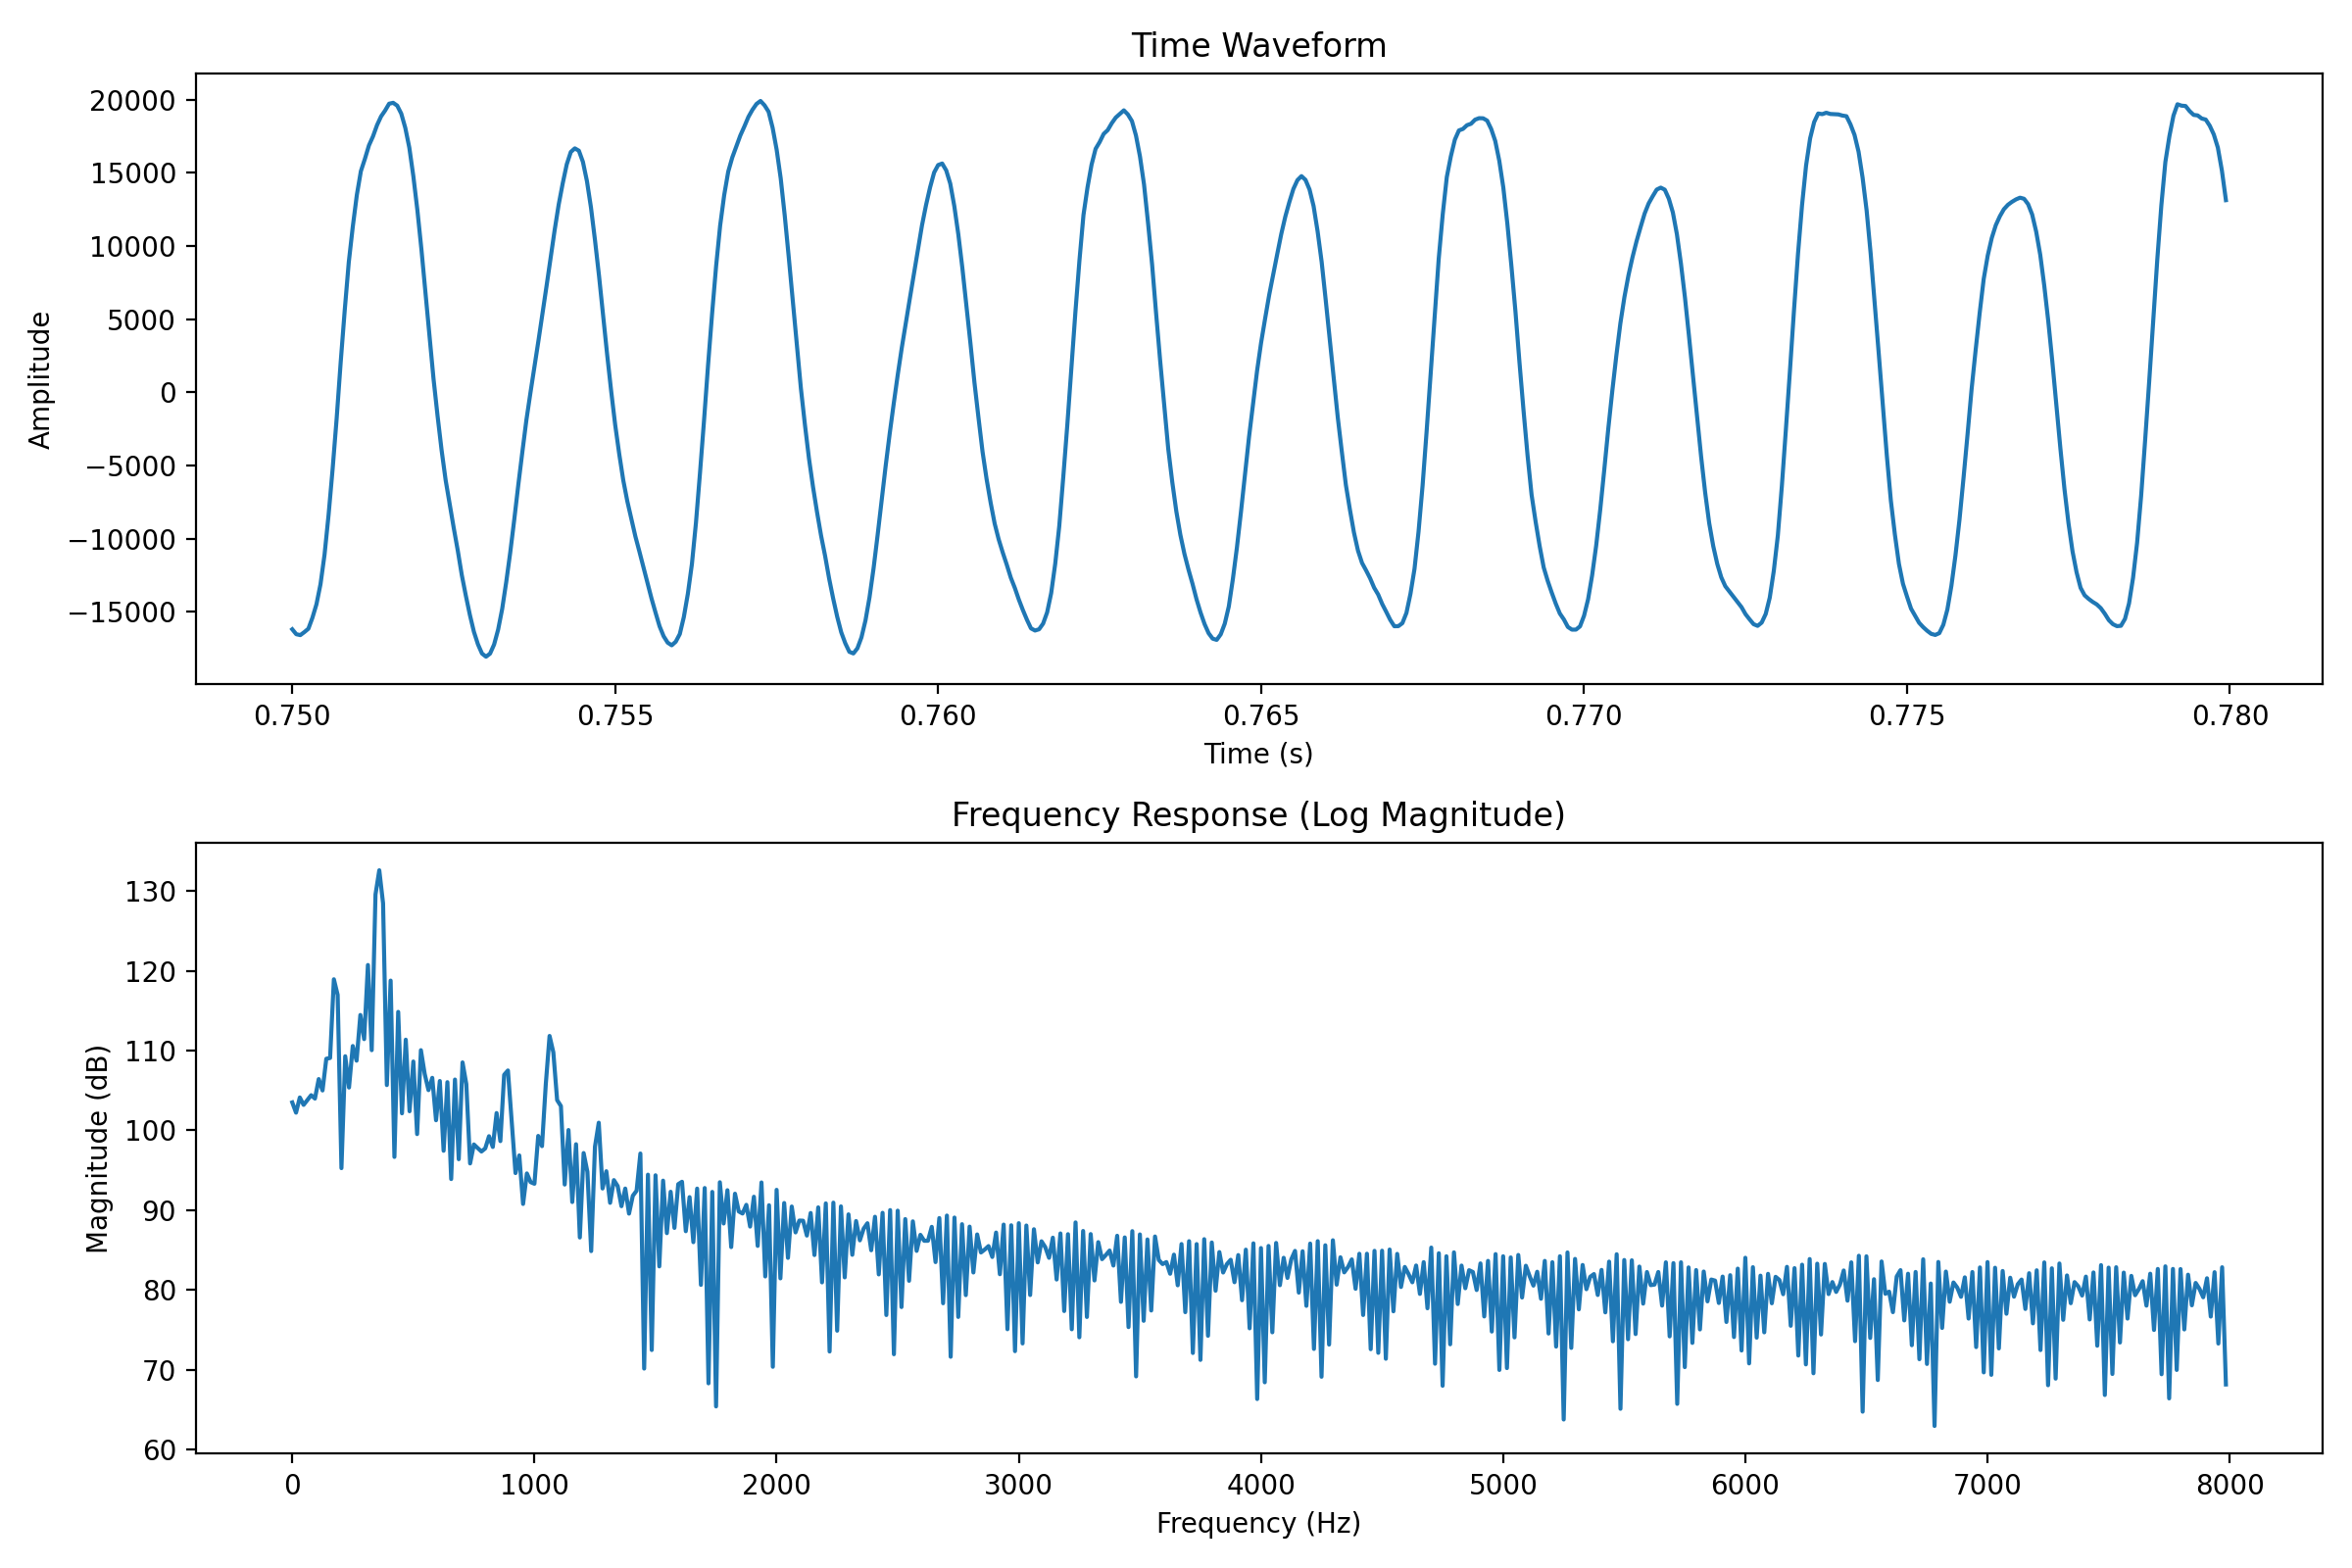

<IPython.core.display.Javascript object>


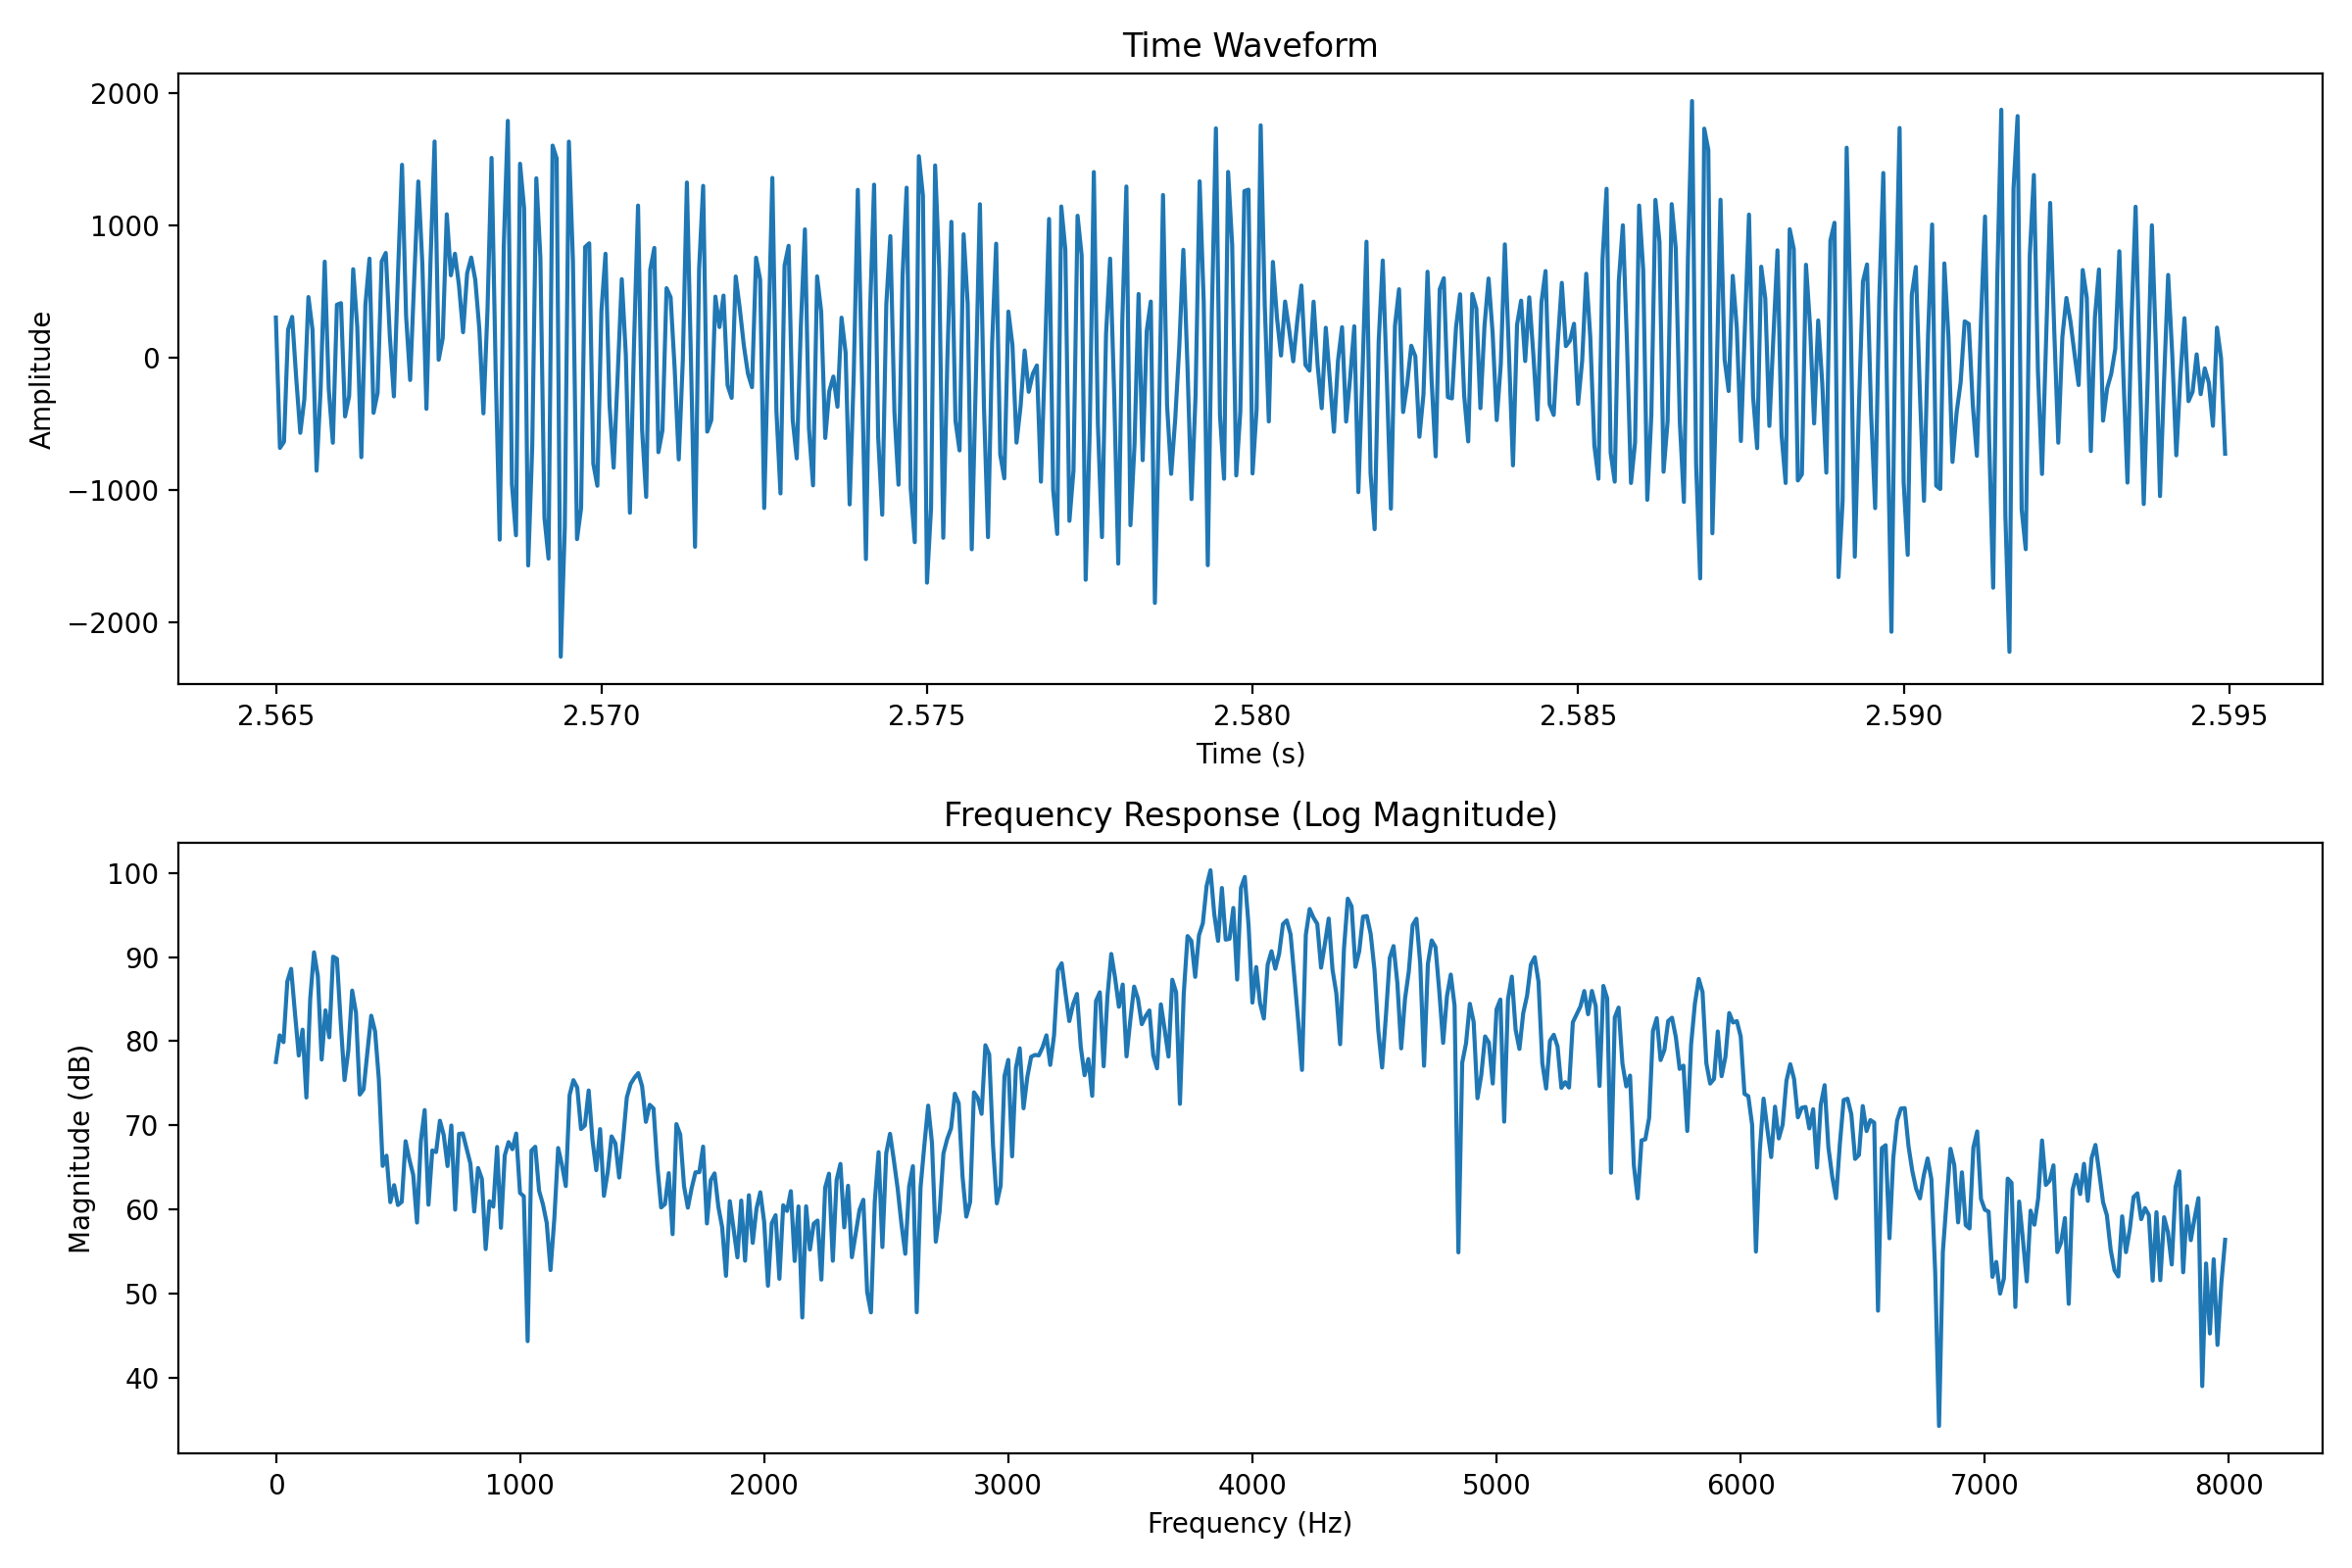

In [19]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup

# Function to get the note frequencies from the given URL
def get_note_frequencies(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('center')
    rows = table.find_all('tr')
    note_freqs = {}
    for row in rows[1:]:
        cols = row.find_all('td')
        note = cols[0].text
        freq = float(cols[1].text)
        note_freqs[note] = freq
    return note_freqs

# Function to find the closest note for a given frequency
def find_closest_note(freq, note_freqs):
    closest_note = min(note_freqs.keys(), key=lambda note: abs(freq - note_freqs[note]))
    return closest_note

# Get the note frequencies
note_freqs = get_note_frequencies('https://pages.mtu.edu/~suits/notefreqs.html')

# Find the fundamental frequency and corresponding note for signal_b
fund_freq_b = freq_b[np.argmax(np.abs(xhf_b))]
closest_note_b = find_closest_note(fund_freq_b, note_freqs)
print(f'The fundamental frequency for signal_b is {fund_freq_b} Hz, which corresponds to the note {closest_note_b}.')

# Find the fundamental frequency and corresponding note for signal_c
fund_freq_c = freq_c[np.argmax(np.abs(xhf_c))]
closest_note_c = find_closest_note(fund_freq_c, note_freqs)
print(f'The fundamental frequency for signal_c is {fund_freq_c} Hz, which corresponds to the note {closest_note_c}.')

# Plot the log magnitude of the frequency response for signal_b
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(signal_b)) / fs + start_time_b, signal_b)
plt.title('Time Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(freq_b[:nfft//2], 20*np.log10(np.abs(xhf_b[:nfft//2])))
plt.title('Frequency Response (Log Magnitude)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.tight_layout()
plt.show()

# Plot the log magnitude of the frequency response for signal_c
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(signal_c)) / fs + start_time_c, signal_c)
plt.title('Time Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(freq_c[:nfft//2], 20*np.log10(np.abs(xhf_c[:nfft//2])))
plt.title('Frequency Response (Log Magnitude)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.tight_layout()
plt.show()
